<a href="https://colab.research.google.com/github/yashasrohanr/Android-Learning/blob/main/actual_face_detection_and_storage_with_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe opencv-python-headless
!pip install dlib
!pip install face_recognition



  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0.tar.gz (100.1 MB)
  Preparing metadata (setup.py) ... done
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=dc4a57e99e882302cbd6bd8affda8ce31950b089578857a4ef2496fc1b74a67e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving family1.jpeg to family1.jpeg
Saving family2.jpeg to family2.jpeg
Saving family3.jpeg to family3.jpeg
Saving family4.jpeg to family4.jpeg


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Nose tip for image family1.jpeg:
x: 0.776041031
y: 0.241907835

Nose tip for image family1.jpeg:
x: 0.269387811
y: 0.244231462



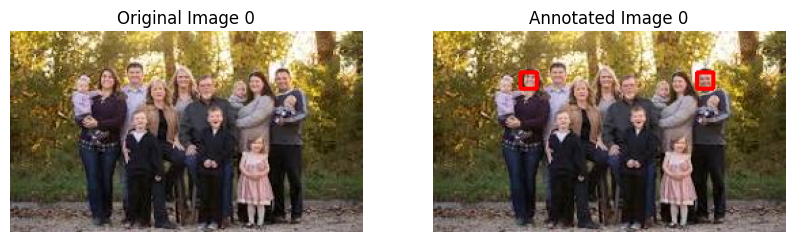

Nose tip for image family2.jpeg:
x: 0.478454888
y: 0.292089134

Nose tip for image family2.jpeg:
x: 0.370323598
y: 0.426213

Nose tip for image family2.jpeg:
x: 0.566970587
y: 0.253490895

Nose tip for image family2.jpeg:
x: 0.272558123
y: 0.482065737

Nose tip for image family2.jpeg:
x: 0.669577241
y: 0.379949629



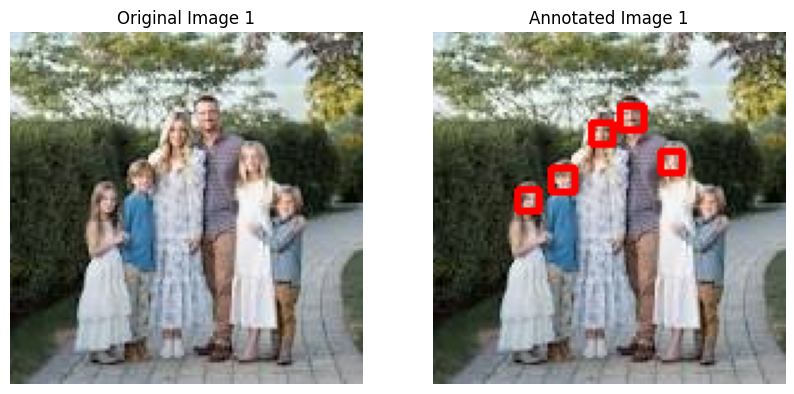

Nose tip for image family3.jpeg:
x: 0.31979391
y: 0.315595299

Nose tip for image family3.jpeg:
x: 0.240344837
y: 0.279317051

Nose tip for image family3.jpeg:
x: 0.169202939
y: 0.312576622

Nose tip for image family3.jpeg:
x: 0.74644655
y: 0.329374701

Nose tip for image family3.jpeg:
x: 0.814481378
y: 0.342831463

Nose tip for image family3.jpeg:
x: 0.41991663
y: 0.320123464



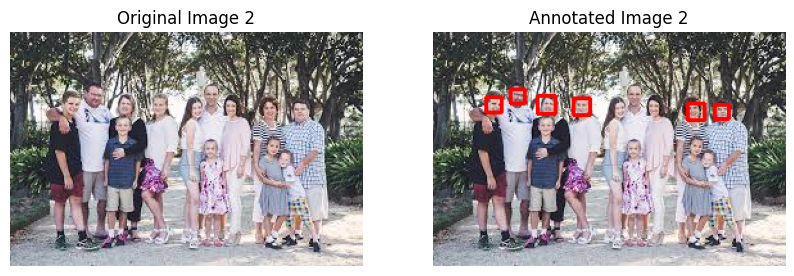

Nose tip for image family4.jpeg:
x: 0.596085668
y: 0.295094877

Nose tip for image family4.jpeg:
x: 0.772362232
y: 0.347143918

Nose tip for image family4.jpeg:
x: 0.399763256
y: 0.254901558

Nose tip for image family4.jpeg:
x: 0.249427587
y: 0.327086836

Nose tip for image family4.jpeg:
x: 0.615330338
y: 0.479991227

Nose tip for image family4.jpeg:
x: 0.677770853
y: 0.27211085

Nose tip for image family4.jpeg:
x: 0.33774665
y: 0.416412741

Nose tip for image family4.jpeg:
x: 0.308018744
y: 0.20012027

Nose tip for image family4.jpeg:
x: 0.485636711
y: 0.535955787

Nose tip for image family4.jpeg:
x: 0.51695776
y: 0.159830779

Nose tip for image family4.jpeg:
x: 0.645000875
y: 0.670952439

Nose tip for image family4.jpeg:
x: 0.459519893
y: 0.325313956

Nose tip for image family4.jpeg:
x: 0.403012
y: 0.478190809



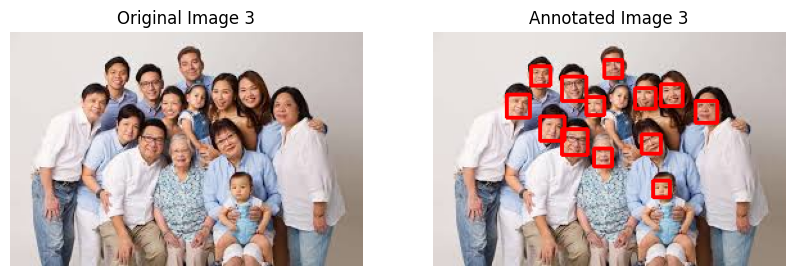

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize Mediapipe face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# List of uploaded image files
IMAGE_FILES = list(uploaded.keys())  # Automatically fetch uploaded image file names

# Function to display images using matplotlib
def display_images(before_image, after_image, title_before, title_after):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(title_before)
    axes[0].axis('off')  # Hide axis

    # Display the annotated image
    axes[1].imshow(cv2.cvtColor(after_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title(title_after)
    axes[1].axis('off')  # Hide axis

    plt.show()

# Function to draw a red thin outline box
def draw_red_outline_box(image, detection, thickness=2):
    # Get the bounding box coordinates
    bboxC = detection.location_data.relative_bounding_box
    image_height, image_width, _ = image.shape
    x_min = int(bboxC.xmin * image_width)
    y_min = int(bboxC.ymin * image_height)
    box_width = int(bboxC.width * image_width)
    box_height = int(bboxC.height * image_height)

    # Draw a red rectangle with the specified thickness
    cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height), (0, 0, 255), thickness)

# Face detection setup for static images
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.2) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    # Read the image
    image = cv2.imread(file)

    # Convert the image from BGR to RGB as required by MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to detect faces
    results = face_detection.process(image_rgb)

    # Make a copy of the original image for annotation
    annotated_image = image.copy()

    # If faces are detected, draw red thin bounding boxes
    if results.detections:
      for detection in results.detections:
        # Print Nose Tip Coordinates
        print(f'Nose tip for image {file}:')
        print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))

        # Draw the red outline box
        draw_red_outline_box(annotated_image, detection, thickness=2)

      # Display the original and annotated images
      display_images(image, annotated_image, f'Original Image {idx}', f'Annotated Image {idx}')
    else:
      print(f"No face detected in {file}.")


In [ ]:
import cv2
import mediapipe as mp
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

# Initialize Mediapipe face detection
mp_face_detection = mp.solutions.face_detection

# Global array to store face embeddings and corresponding names
face_db = []

# Function to display images using matplotlib
def display_images_with_faces(image, face_locations, names):
    for (top, right, bottom, left), name in zip(face_locations, names):
        # Draw rectangle around the face
        cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
        # Label the face with the name
        cv2.putText(image, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

    # Display the image with faces and names
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Function to add a new face to the database
def add_face_to_db(face_encoding, face_image):
    # Show the face and ask the user to tag it
    plt.imshow(face_image)
    plt.axis('off')
    plt.show()

    # Get the name from the user
    name = input("Enter the name for the new face: ")

    # Add the face encoding and the name to the database
    face_db.append({
        "name": name,
        "encoding": face_encoding
    })

# Function to recognize faces from the database
def recognize_faces_in_image(image, face_encodings):
    names = []
    for encoding in face_encodings:
        # Check if this face matches any in the database
        matches = [np.linalg.norm(encoding - db_entry['encoding']) < 0.6 for db_entry in face_db]

        if True in matches:
            # If there's a match, get the name of the first matching face
            first_match_index = matches.index(True)
            names.append(face_db[first_match_index]['name'])
        else:
            # If it's a new face, ask the user to tag it
            add_face_to_db(encoding, image)
            names.append(face_db[-1]['name'])

    return names

# Face detection and recognition for static images
def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB for face recognition
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Use face_recognition to detect face locations
    face_locations = face_recognition.face_locations(image_rgb)

    # Use face_recognition to encode the detected faces
    face_encodings = face_recognition.face_encodings(image_rgb, face_locations)

    if face_encodings:
        # Recognize the faces or add them to the database
        names = recognize_faces_in_image(image, face_encodings)

        # Display the results with names and faces
        display_images_with_faces(image, face_locations, names)
    else:
        print("No faces detected in the image.")

# Process the image to detect faces and either recognize or add them to the database
IMAGE_FILES = list(uploaded.keys())  # Automatically fetch uploaded image file names

for file in IMAGE_FILES:
    process_image(file)


No faces detected in the image.
No faces detected in the image.
No faces detected in the image.
No faces detected in the image.


In [1]:
import cv2
import mediapipe as mp
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

# Initialize Mediapipe face detection
mp_face_detection = mp.solutions.face_detection

# Global array to store face embeddings and corresponding names
face_db = []

# Function to display images using matplotlib
def display_images_with_faces(image, face_locations, names):
    for (top, right, bottom, left), name in zip(face_locations, names):
        # Draw rectangle around the face
        cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
        # Label the face with the name
        cv2.putText(image, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

    # Display the image with faces and names
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Function to add a new face to the database
def add_face_to_db(face_encoding, face_image, face_location):
    top, right, bottom, left = face_location
    # Crop the face for easier viewing
    face_crop = face_image[top:bottom, left:right]

    # Display the cropped face and ask the user to tag it
    plt.imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Get the name from the user
    name = input("Enter the name for the new face: ")

    # Add the face encoding and the name to the database
    face_db.append({
        "name": name,
        "encoding": face_encoding
    })

# Function to recognize faces from the database
def recognize_faces_in_image(image, face_encodings, face_locations):
    names = []
    for encoding, location in zip(face_encodings, face_locations):
        # Check if this face matches any in the database
        matches = [np.linalg.norm(encoding - db_entry['encoding']) < 0.6 for db_entry in face_db]

        if True in matches:
            # If there's a match, get the name of the first matching face
            first_match_index = matches.index(True)
            names.append(face_db[first_match_index]['name'])
        else:
            # If it's a new face, ask the user to tag it
            add_face_to_db(encoding, image, location)
            names.append(face_db[-1]['name'])

    return names

# Face detection and recognition for static images
def process_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB for face recognition
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Use face_recognition to detect face locations
    face_locations = face_recognition.face_locations(image_rgb)

    # Use face_recognition to encode the detected faces
    face_encodings = face_recognition.face_encodings(image_rgb, face_locations)

    if face_encodings:
        # Recognize the faces or add them to the database
        names = recognize_faces_in_image(image, face_encodings, face_locations)

        # Display the results with names and faces
        display_images_with_faces(image, face_locations, names)
    else:
        print("No faces detected in the image.")

# Process the image to detect faces and either recognize or add them to the database
# For Colab, replace uploaded.keys() with the image paths you'd like to process
IMAGE_FILES = list(uploaded.keys())  # Automatically fetch uploaded image file names

for file in IMAGE_FILES:
    process_image(file)


ModuleNotFoundError: No module named 'mediapipe'